In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
ex = Dataset('./ex.nc')
ts = Dataset('./ts.nc')

In [3]:
ex.variables.keys()

dict_keys(['time', 'y', 'x', 'topg', 'usurf', 'thk', 'smb', 'velbar_mag', 'velsurf_mag', 'uvelsurf', 'vvelsurf', 'uvelbase', 'vvelbase'])

In [4]:
ts.variables.keys()

dict_keys(['time', 'vol', 'area'])

Text(0.5, 0, 'Year of simulation')

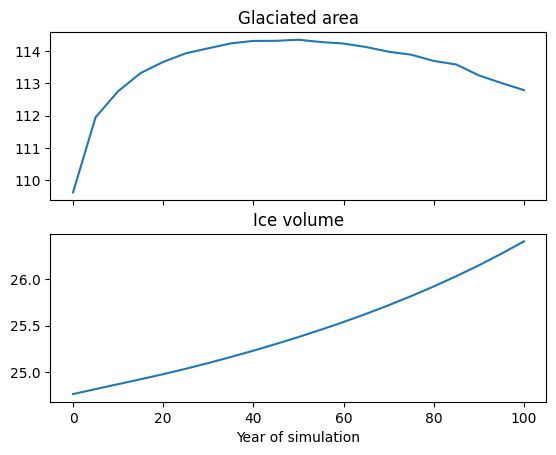

In [5]:
fig, ax = plt.subplots(2, 1, sharex = True)
years = np.arange(0, 105, 5)

ax[0].plot(years, ts['area'][:])
ax[1].plot(years, ts['vol'][:])

ax[0].set_title('Glaciated area')
ax[1].set_title('Ice volume')
ax[1].set_xlabel('Year of simulation')

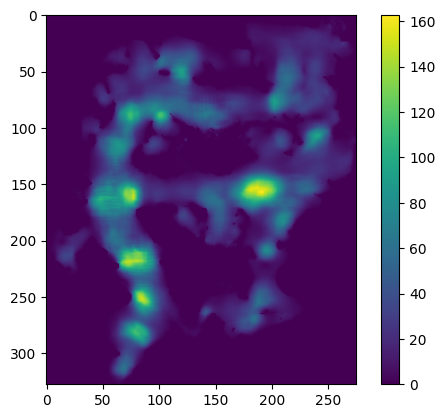

In [14]:
im = plt.imshow(ex['velbar_mag'][0,:,:])
plt.colorbar(im)
plt.show()

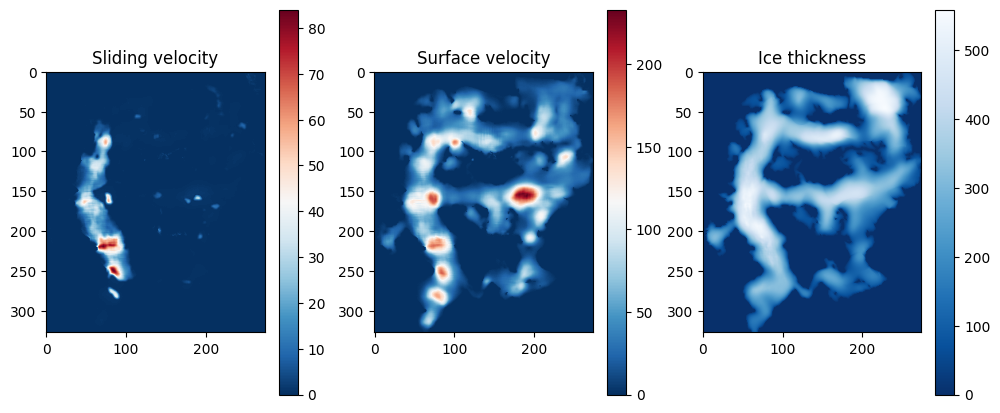

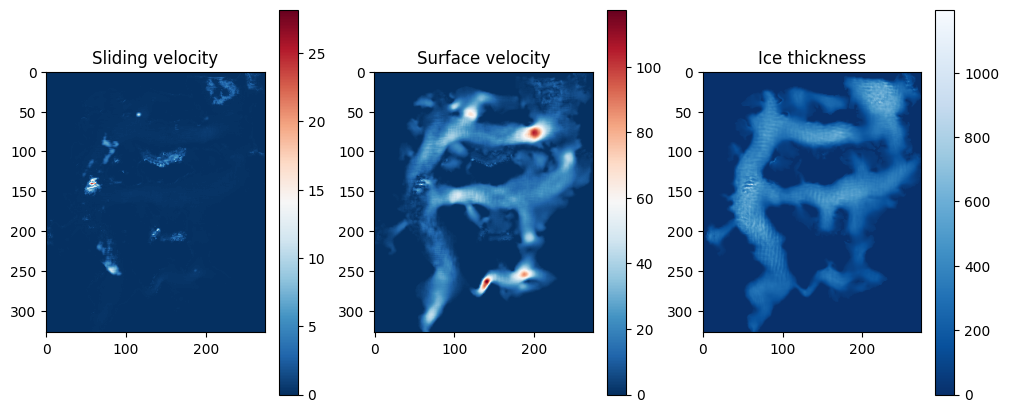

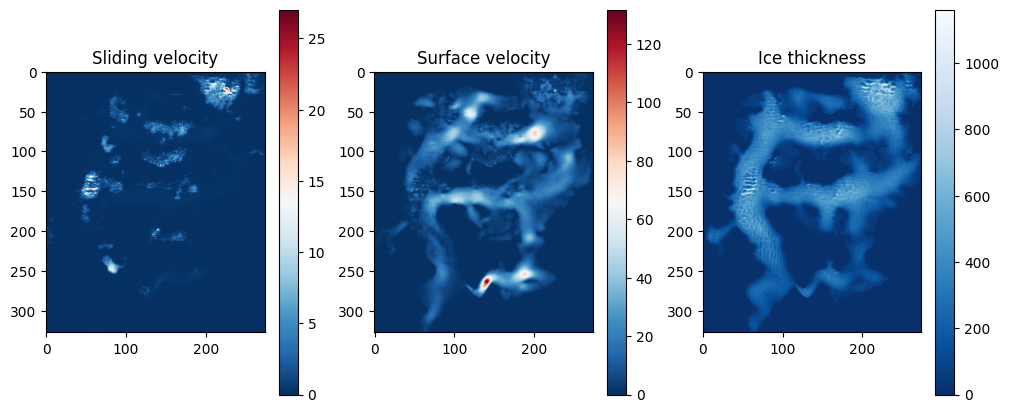

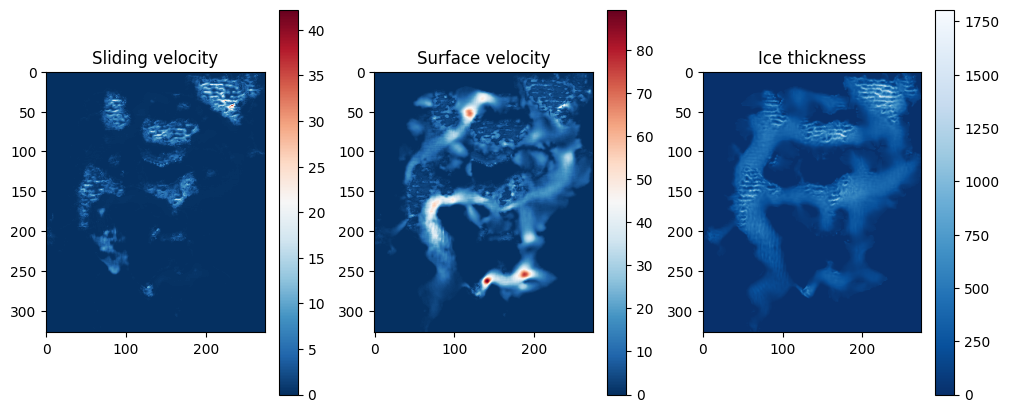

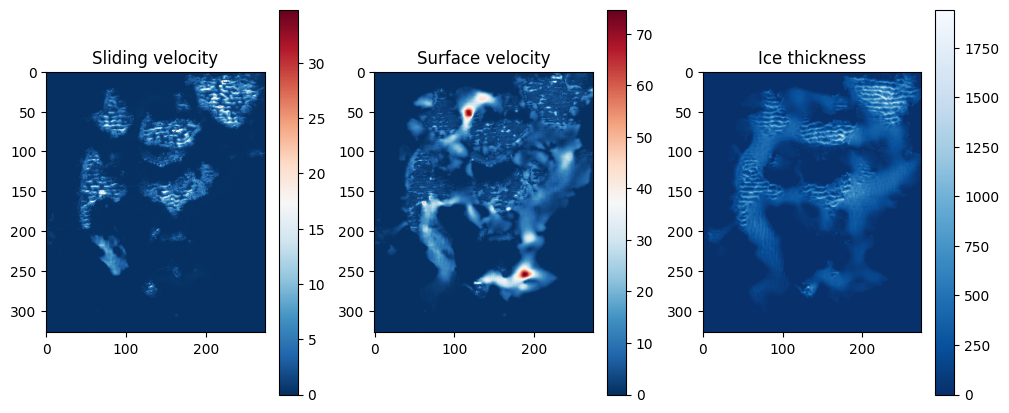

In [6]:
ub = np.sqrt(ex['vvelbase'][:]**2 + ex['uvelbase'][:]**2)

for i in range(ub.shape[0]):
    if i % 5 == 0:
        fig, ax = plt.subplots(1, 3, figsize = (12, 5))
        im0 = ax[0].imshow(ub[i,:,:], cmap = 'RdBu_r')
        plt.colorbar(im0)
        im1 = ax[1].imshow(ex['velsurf_mag'][i,:,:], cmap = 'RdBu_r')
        plt.colorbar(im1)
        im2 = ax[2].imshow(ex['thk'][i,:,:], cmap = 'Blues_r')
        plt.colorbar(im2)
        
        ax[0].set_title('Sliding velocity')
        ax[1].set_title('Surface velocity')
        ax[2].set_title('Ice thickness')
    
plt.show()